In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：4，动作空间维度：2
开始训练！
回合：20/600，奖励：27.00，评估奖励：22.80，最佳评估奖励：22.80，更新模型！ 0.37
回合：40/600，奖励：23.00，评估奖励：27.00，最佳评估奖励：27.00，更新模型！ 0.22
回合：60/600，奖励：63.00，评估奖励：14.00，最佳评估奖励：27.00，0.12
回合：80/600，奖励：12.00，评估奖励：22.20，最佳评估奖励：27.00，0.08
回合：100/600，奖励：18.00，评估奖励：23.00，最佳评估奖励：27.00，0.06
回合：120/600，奖励：12.00，评估奖励：20.40，最佳评估奖励：27.00，0.05
回合：140/600，奖励：26.00，评估奖励：17.40，最佳评估奖励：27.00，0.05
回合：160/600，奖励：26.00，评估奖励：22.80，最佳评估奖励：27.00，0.05
回合：180/600，奖励：14.00，评估奖励：29.80，最佳评估奖励：29.80，更新模型！ 0.05
回合：200/600，奖励：21.00，评估奖励：19.20，最佳评估奖励：29.80，0.05
回合：220/600，奖励：34.00，评估奖励：17.60，最佳评估奖励：29.80，0.05
回合：240/600，奖励：25.00，评估奖励：19.80，最佳评估奖励：29.80，0.05
回合：260/600，奖励：40.00，评估奖励：24.80，最佳评估奖励：29.80，0.05
回合：280/600，奖励：16.00，评估奖励：22.80，最佳评估奖励：29.80，0.05
回合：300/600，奖励：29.00，评估奖励：34.20，最佳评估奖励：34.20，更新模型！ 0.05
回合：320/600，奖励：24.00，评估奖励：34.00，最佳评估奖励：34.20，0.05
回合：340/600，奖励：26.00，评估奖励：31.40，最佳评估奖励：34.20，0.05
回合：360/600，奖励：30.00，评估奖励：41.00，最佳评估奖励：41.00，更新模型！ 0.05
回合：380/600，奖励：68.00，评估奖励：47.00，最佳评估奖励：47.00，更新模型！ 0.05
回合：400/600，奖励

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：1/20，奖励：200.00
回合：2/20，奖励：175.00
回合：3/20，奖励：154.00
回合：4/20，奖励：200.00
回合：5/20，奖励：200.00
回合：6/20，奖励：200.00
回合：7/20，奖励：200.00
回合：8/20，奖励：161.00
回合：9/20，奖励：200.00
回合：10/20，奖励：200.00
回合：11/20，奖励：200.00
回合：12/20，奖励：200.00
回合：13/20，奖励：159.00
回合：14/20，奖励：200.00
回合：15/20，奖励：200.00
回合：16/20，奖励：200.00
回合：17/20，奖励：200.00
回合：18/20，奖励：198.00
回合：19/20，奖励：184.00
回合：20/20，奖励：200.00
完成测试


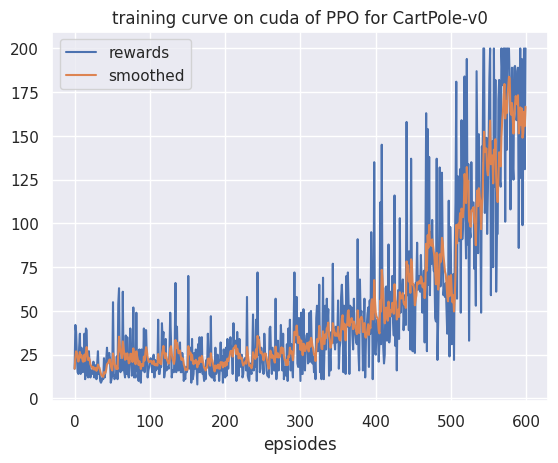

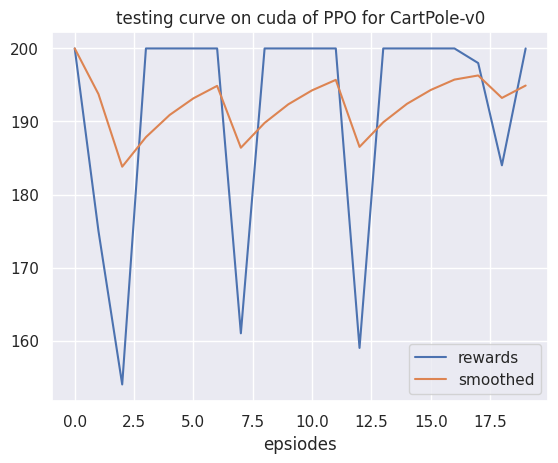

In [2]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

In [1]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


NameError: name 'best_agent' is not defined

tensor([[[[0.0037, 0.0037, 0.0956, 0.0042, 0.0042, 0.0039, 0.0058, 0.0039]]]],
       grad_fn=<ToCopyBackward0>)

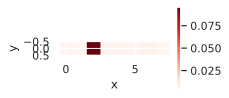

In [6]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [5]:
# torch.save(best_agent, './Data/CartPole-v0-StateAttention-None/Ex1.pt')

/home/wyq/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
